In [26]:
import numpy as np
import pandas as pd
import cmath

In [27]:
%matplotlib widget
import matplotlib.pyplot as plt

### Импорт данных

In [28]:
list_of_angles = [51, 52, 53, 54, 55, 56, 57, 58, 60]

In [29]:
first_app = True
for angle in list_of_angles:
    file = str(angle) + 'deg.s1p'
    temp_2A = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\250923\\scan\\5.7V_2A\\' + file,
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
    temp_0A = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\250923\\scan\\0V\\' + file,
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
    temp_free = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\250923\\scan\\Free\\' + file,
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
    temp_2A['Angle'] = angle
    temp_0A['Angle'] = angle
    temp_free['Angle'] = angle
    if first_app:
        data_2A = temp_2A.loc[temp_2A['Frequency'] == 25.0*1e9]
        data_0A = temp_0A.loc[temp_0A['Frequency'] == 25.0*1e9]
        data_free = temp_free.loc[temp_free['Frequency'] == 25.0*1e9]
        first_app = False
    else:
        data_2A = pd.concat([data_2A, temp_2A.loc[temp_2A['Frequency'] == 25.0*1e9]], ignore_index=True)
        data_0A = pd.concat([data_0A, temp_0A.loc[temp_0A['Frequency'] == 25.0*1e9]], ignore_index=True)
        data_free = pd.concat([data_free, temp_free.loc[temp_free['Frequency'] == 25.0*1e9]], ignore_index=True)

In [30]:
temp_2A = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\250923\\scan\\5.7V_2A\\50deg.s1p',
                        sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                        names=['Frequency', 'ReS12', 'ImS12'])
temp_free = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\250923\\scan\\Free\\' + file,
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
temp_2A['Angle'] = 50
temp_free['Angle'] = 50

data_2A = pd.concat([temp_2A.loc[temp_2A['Frequency'] == 25.0*1e9], data_2A], ignore_index=True)
data_free = pd.concat([temp_free.loc[temp_free['Frequency'] == 25.0*1e9], data_free], ignore_index=True)

In [40]:
data_0A

,Frequency,Angle,s12
0,2.500000e+10,51,0.008321+0.003256j
1,2.500000e+10,52,0.009513-0.004156j
2,2.500000e+10,53,0.008631-0.013366j
3,2.500000e+10,54,0.005676-0.015573j
4,2.500000e+10,55,0.000561-0.020295j
5,2.500000e+10,56,-0.008685-0.018810j
6,2.500000e+10,57,-0.016926-0.009089j
7,2.500000e+10,58,-0.014387-0.005975j
8,2.500000e+10,60,-0.012902+0.001574j


Очистка памяти от ненужных переменных

In [32]:
del first_app
del temp_0A
del temp_2A
del temp_free
del list_of_angles
del angle
del file

In [33]:
data_0A['s12']=data_0A['ReS12']+1j*data_0A['ImS12']
data_2A['s12']=data_2A['ReS12']+1j*data_2A['ImS12']
data_free['s12']=data_free['ReS12']+1j*data_free['ImS12']

In [34]:
data_0A = data_0A.drop(['ReS12', 'ImS12'], axis=1)
data_2A = data_2A.drop(['ReS12', 'ImS12'], axis=1)
data_free = data_free.drop(['ReS12', 'ImS12'], axis=1)

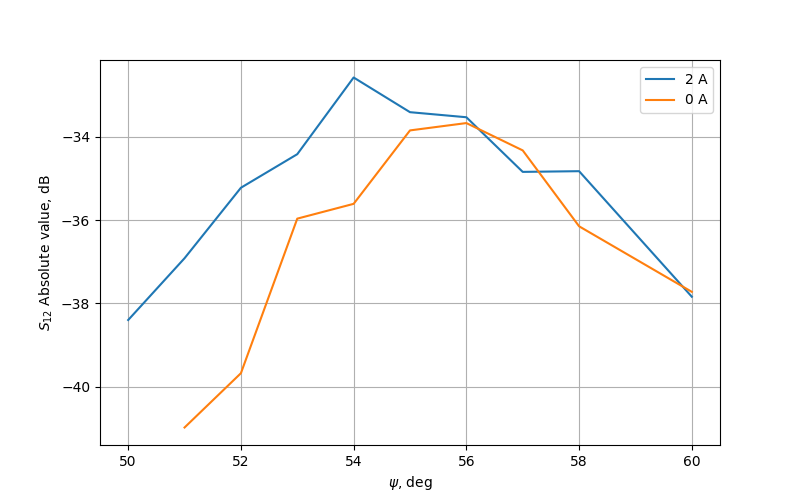

In [35]:
fig1 = plt.figure(figsize=(8,5))

ax_1 = fig1.add_subplot(111)
ax_1.plot(data_2A['Angle'], 20*np.log10(data_2A['s12'].apply(abs)), label='2 A')
ax_1.plot(data_0A['Angle'], 20*np.log10(data_0A['s12'].apply(abs)), label='0 A')
ax_1.set_xlabel(r'$\psi$, deg')
ax_1.set_ylabel(r'$S_{12}$ Absolute value, dB')
ax_1.legend()
ax_1.grid()

plt.show()

In [43]:
free_0A = data_free['s12'].iloc[1:].reset_index()

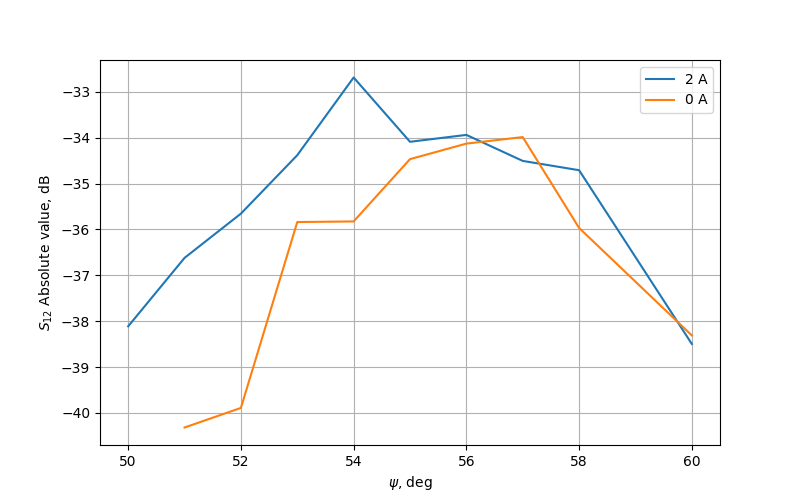

In [46]:
fig2 = plt.figure(figsize=(8,5))

ax_1 = fig2.add_subplot(111)
ax_1.plot(data_2A['Angle'], 20*np.log10((data_2A['s12']-data_free['s12']).apply(abs)), label='2 A')
ax_1.plot(data_0A['Angle'], 20*np.log10((data_0A['s12'] - free_0A['s12']).apply(abs)), label='0 A')
ax_1.set_xlabel(r'$\psi$, deg')
ax_1.set_ylabel(r'$S_{12}$ Absolute value, dB')
ax_1.legend()
ax_1.grid()

plt.show()